# Classification of Consumer Complaints

The Consumer Financial Protection Bureau publishes the Consumer Complaint Database, a collection of complaints about consumer financial products and services that were sent to companies for response. Complaints are published after the company responds, confirming a commercial relationship with the consumer, or after 15 days, whichever comes first. 

You have been provided with a dataset of over 350,000 such complaints for 5 common issue types. Your goal is to train a text classification model to identify the issue type based on the consumer complaint narrative. The data can be downloaded from https://drive.google.com/file/d/1Hz1gnCCr-SDGjnKgcPbg7Nd3NztOLdxw/view?usp=share_link 

At the end of the project, your team should should prepare a short presentation where you talk about the following:
* What steps did you take to preprocess the data?
* How did a model using unigrams compare to one using bigrams or trigrams?
* How did a count vectorizer compare to a tfidf vectorizer?
* What models did you try and how successful were they? Where did they struggle? Were there issues that the models commonly mixed up?
* What words or phrases were most influential on your models' predictions?

**Bonus:** A larger dataset containing 20 additional categories can be downloaded from https://drive.google.com/file/d/1gW6LScUL-Z7mH6gUZn-1aNzm4p4CvtpL/view?usp=share_link. How well do your models work with these additional categories?

In [1]:
import pandas as pd
import numpy as np
import missingno as msno

In [2]:
complaints = pd.read_csv('../data/complaints.csv')

In [3]:
complaints=complaints.rename(columns={'Consumer complaint narrative':'narrative', 'Issue':'issue'})

In [4]:
complaints.head()

,narrative,issue
0,My name is XXXX XXXX this complaint is not mad...,Incorrect information on your report
1,I searched on XXXX for XXXXXXXX XXXX and was ...,Fraud or scam
2,I have a particular account that is stating th...,Incorrect information on your report
3,I have not supplied proof under the doctrine o...,Attempts to collect debt not owed
4,Hello i'm writing regarding account on my cred...,Incorrect information on your report


In [5]:
complaints.describe()

,narrative,issue
count,353432,353432
unique,353228,5
top,My information was used to obtain an apartment...,Incorrect information on your report
freq,3,229305


In [6]:
complaints.shape

(353432, 2)

In [7]:
complaints['issue'].value_counts()

issue
Incorrect information on your report    229305
Attempts to collect debt not owed        73163
Communication tactics                    21243
Struggling to pay mortgage               17374
Fraud or scam                            12347
Name: count, dtype: int64

In [8]:
complaints['narrative'].value_counts()

narrative
My information was used to obtain an apartment, cell phone, and an auto loan with my ex-partner. I am a victim of identity theft and have put this off for too long. I've completed the proper steps, 1. notify creditors 2. police report 3. informed the state of Texas. The individual I've suspected for this theft is now deceased, and the police department said to contact the federal trade commission to seek relief. These companies disregard laws and don't care who's credit or lives they impact.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

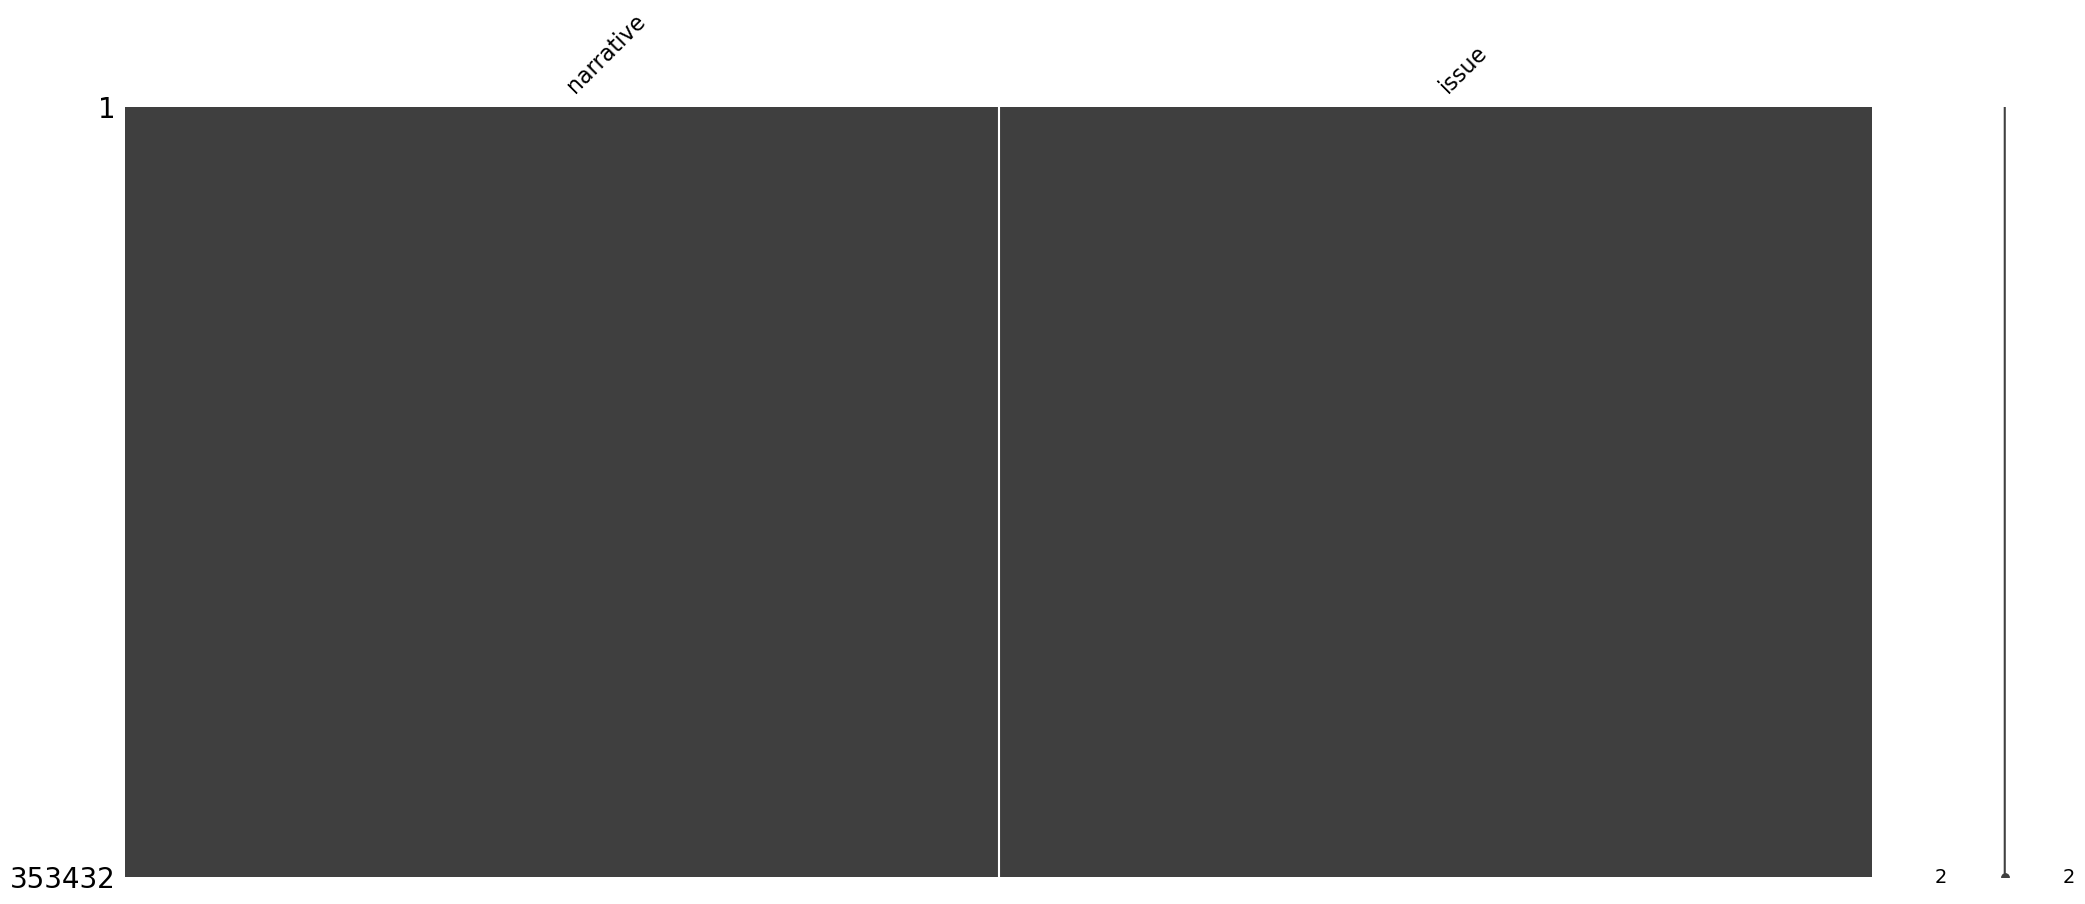

In [9]:
msno.matrix(complaints);

Overall the dataset is pretty 'clean'.  As a simple exercise, let's see if we can do a simple sentiment analysis on it.  